# <font color=Grey>**Data Mind Classes**</font> 
### <font color=Black>Class 10A: Matrix Factorization Techniques and UseCases </font> 

<div class="alert alert-block alert-info">

### ***Table of Contents***

<div class="alert alert-block alert-info">
    
> - Matrix Factorization recap
> - SVD and NMF
> - Topic Modelling in Text Mining
> - Resources

# 1.0 Matrix Factorization Recap

- `Unsupervised learning`

- `Matrix Factorizataion or Decomposition means splitting the original matrix (BOW, TFIDF, etc) into smaller and more relatable parts`

- `Simple Example:`
    > - `We can write 10 as product of its factors such that 10 = 2*5`
    > - `This breaks down 10 into its corresponding unique factors and helps us understand the constituent elements`

# 2.0 SVD and NMF:
### (Singular Value Decomposition and Non-negative Matrix Factorization)

- `Both methods are ways to do matrix factorization to achieve better understanding of the data.`

- `Use Cases:`

> - `Semantic Analysis`
> - `Collaborative Filtering methods`
> - `Data Compression`

## 2.1 SVD

 - `The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows`

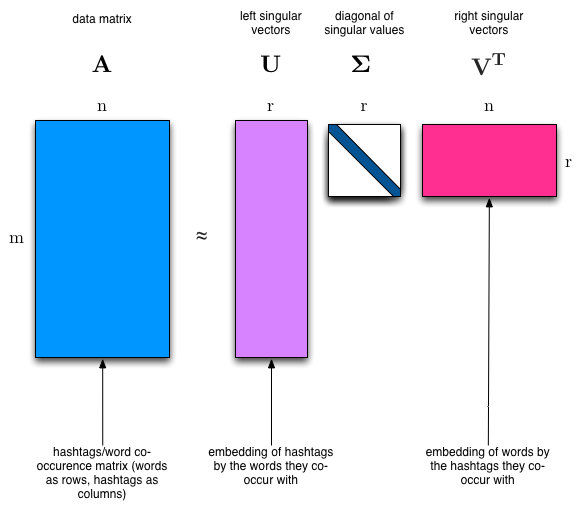

# 2.2 Topic Modelling  in Text Analytics

- `Given a corpus of text/documents we want to find out which documents are in the "talking" about similar things and which are not`
- `Think of clustering for text but using advanced matrix factorization concepts`
- `Useful to understand product reviews, chat experiences, sentiments`

# 2.3 Topic Modeling Techniques: Walkthrough on Usenet dataset

In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

### Load subset of data

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']  ### download only some categories
remove = ('headers', 'footers', 'quotes') ### 
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [4]:
### check shape of data
newsgroups_train.filenames.shape, newsgroups_train.target.shape

((2034,), (2034,))

In [5]:
#### take a look at the data
print("\n".join(newsgroups_train.data[:3]))

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries.

 >In article <1993Apr19.020359.26996@sq.sq.com>, msb@sq.sq.c

In [6]:
### take a look at the target
np.array(newsgroups_train.target_names)[newsgroups_train.target[:3]]

array(['comp.graphics', 'talk.religion.misc', 'sci.space'], 
      dtype='<U18')

In [7]:
###  the targets are actually integers, we need to map those to category names
newsgroups_train.target[:3]

array([1, 3, 2], dtype=int64)

- `Next, we need to do the following:`
> - `Process the text dataset corpus by eliminating stop words (the, it, if, us, we and so on... common words)`
> - `Generate count tokens of vocab, for now we will use simple counts; we can also try tfidf based tokens`

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [9]:
vectorizer = CountVectorizer(stop_words='english')  ##3 english stopwords
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape  ### has shape (n documents , n vocab)

(2034, 26576)

In [10]:
### generate vocab as well
vocab = np.array(vectorizer.get_feature_names())

In [11]:
### check shape
vocab.shape

(26576,)

In [12]:
### view some vocab entries
vocab[7000:7020]

array(['cosmonauts', 'cosmos', 'cosponsored', 'cost', 'costa', 'costar',
       'costing', 'costly', 'costruction', 'costs', 'cosy', 'cote',
       'couched', 'couldn', 'council', 'councils', 'counsel', 'counselees',
       'counselor', 'count'], 
      dtype='<U80')

In [13]:
### SVD on count tokens

In [14]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

Wall time: 42.7 s


In [15]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


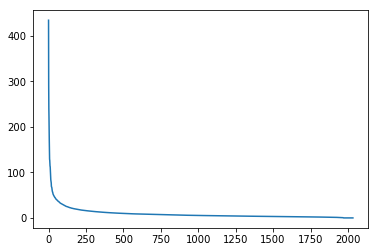

In [16]:
plt.plot(s);

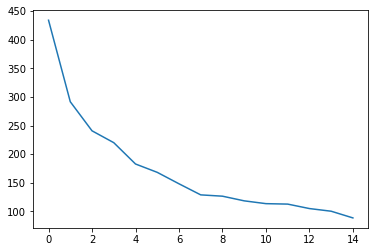

In [17]:
plt.plot(s[:15])

In [18]:
num_top_words=8  ### number of top words corresponsing to each topic

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [19]:
show_topics(Vh[:10])

['critus ditto propagandist surname galacticentric kindergarten surreal imaginative',
 'jpeg gif file color quality image jfif format',
 'graphics edu pub mail 128 3d ray ftp',
 'jesus god matthew people atheists atheism does graphics',
 'image data processing analysis software available tools display',
 'god atheists atheism religious believe religion argument true',
 'space nasa lunar mars probe moon missions probes',
 'image probe surface lunar mars probes moon orbit',
 'argument fallacy conclusion example true ad argumentum premises',
 'space larson image theory universe physical nasa material']

In [20]:
_ = np.argsort(Vh[:1])

In [21]:
_ = _[0][:-8-1:-1]

In [22]:
vocab[_]

array(['critus', 'ditto', 'propagandist', 'surname', 'galacticentric',
       'kindergarten', 'surreal', 'imaginative'], 
      dtype='<U80')

- `SVD like but produces only 2 matrices`:
> - `A tall and skinny matrix`
> - `A short fat matrix`
> - `Both matrices are constrained to hold only non-negative values`
- `Data is often non-negative by nature, so it does not make sense to look at negatives like in SVD`
- `Induces sparsity (meaning most elements are zero)`

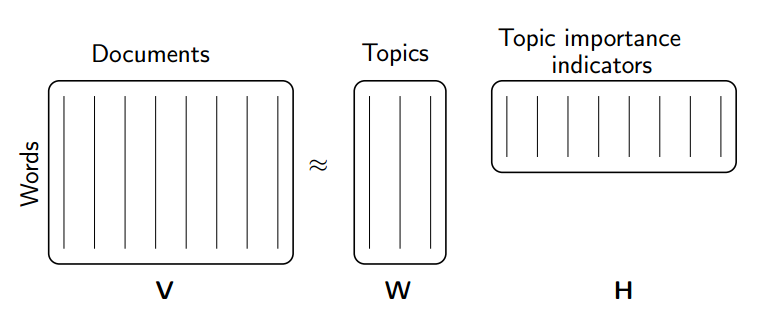

In [23]:
m,n = vectors.shape
d = 5 ### number of topics we want to have in analysis

In [24]:
clf = decomposition.NMF(n_components=d, random_state=1)

W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [25]:
show_topics(H1)

['jpeg image gif file color images format quality',
 'edu graphics pub mail 128 ray ftp send',
 'space launch satellite nasa commercial satellites year market',
 'jesus god people matthew atheists does atheism said',
 'image data available software processing ftp edu analysis']

In [28]:
new = ['This model is not working at all, i know how to make it work']
ab = clf.transform(vectorizer.transform(new))
print("New sentence belong to Topic:",np.argmax(ab))  

### f strings based print method in py3.5+
#print(f"New sentence belong to Topic:{np.argmax(ab)}")  
#### see what i did above; cool new thing called f-strings in python3.5+

New sentence belong to Topic: 3


### Reference:

[Notebook](http://nbviewer.jupyter.org/github/fastai/numerical-linear-algebra/blob/master/nbs/2.%20Topic%20Modeling%20with%20NMF%20and%20SVD.ipynb)

### Further readings:

[The Why and How of Nonnegative Matrix Factorization](https://arxiv.org/pdf/1401.5226.pdf)